## Keras and CNN network

Detect handwritten

In [23]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


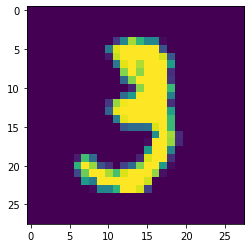

In [4]:
plt.imshow(x_train[10])

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
y_train = to_categorical(y_train)

In [8]:
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Model

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [15]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                1

### Train

In [21]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 91s 48ms/step - loss: 0.2587 - accuracy: 0.9449 - val_loss: 0.0819 - val_accuracy: 0.9723
Epoch 2/3
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.0728 - val_accuracy: 0.9771
Epoch 3/3
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0660 - val_accuracy: 0.9799


In [22]:
model.save("mnist.h5")

In [24]:
my_model = load_model("mnist.h5")

In [25]:
loss, acc = my_model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0660 - accuracy: 0.9799


In [46]:
y_hat = my_model.predict(x_test[16:21])
print(y_hat)
y_label = np.argmax(y_hat, axis=1)
print(y_label)

1/1 [==============================] - 0s 32ms/step
[[1.07947201e-07 2.40313666e-14 7.75205178e-10 3.83908703e-11
  3.66141239e-06 5.67128455e-10 2.64822310e-15 7.17702235e-08
  3.36748099e-06 9.99992847e-01]
 [1.57117839e-08 3.51301321e-10 5.62984503e-09 3.86805752e-08
  7.55929347e-11 4.11458534e-10 6.10467167e-17 1.00000000e+00
  3.01315266e-12 1.38915146e-08]
 [2.90027619e-05 1.48836378e-07 6.34109089e-03 9.20931935e-01
  1.84839650e-04 7.22779110e-02 5.08989046e-07 1.13996293e-07
  2.34353691e-04 9.73236354e-08]
 [5.07372430e-14 5.67472336e-09 5.20821164e-10 1.45903938e-12
  9.99999642e-01 2.96318275e-10 8.60190545e-17 1.16070289e-07
  1.67327514e-07 2.60369468e-08]
 [1.00901704e-10 4.25412100e-06 2.00138015e-06 6.65157393e-04
  2.27367412e-02 1.32720434e-05 2.61852036e-13 2.69831140e-02
  2.31869876e-06 9.49593246e-01]]
[9 7 3 4 9]


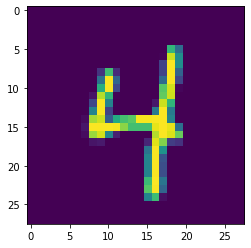

In [48]:
plt.imshow(x_test_org[19])